In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
car=pd.read_csv("/Users/xinjianlu/Downloads/Automobile_data.csv")

In [3]:
car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154.0,5000.0,19,26,16500.0


In [4]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

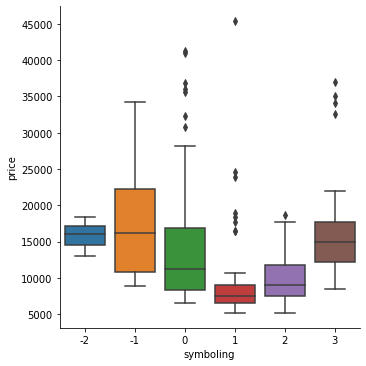

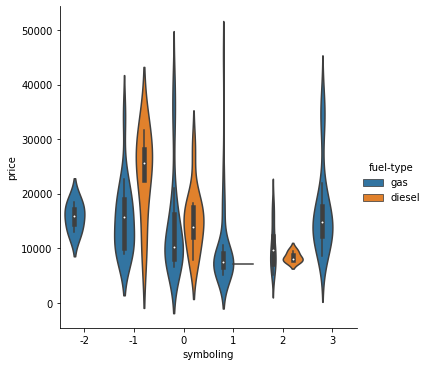

In [6]:
sns.catplot(x="symboling", y="price", data=car,kind="box")
sns.catplot(x="symboling", y="price", data=car,kind="violin",hue="fuel-type")

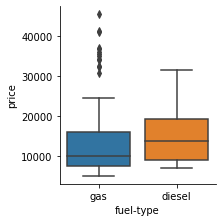

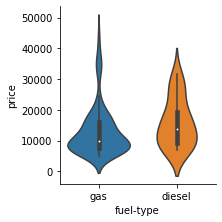

In [7]:
sns.catplot(x="fuel-type", y="price", data=car,kind="box",height=3)
sns.catplot(x="fuel-type", y="price", data=car,kind="violin",height=3)

In [8]:
#sns.catplot(x="num-of-doors", y="price", data=car,kind="violin")

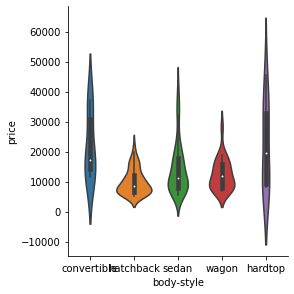

In [9]:
sns.catplot(x="body-style", y="price", data=car,kind="violin",height=4)

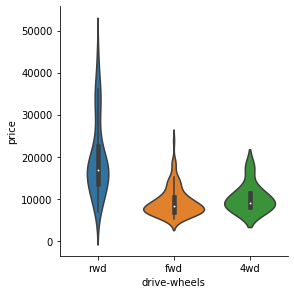

In [10]:
sns.catplot(x="drive-wheels", y="price", data=car,kind="violin",height=4)

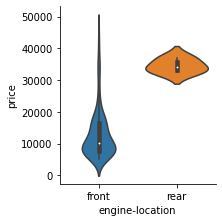

In [11]:
sns.catplot(x="engine-location", y="price", data=car,kind="violin",height=3)

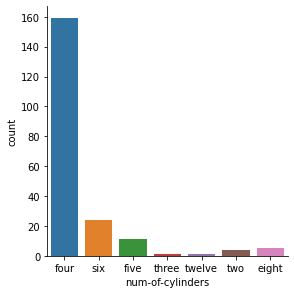

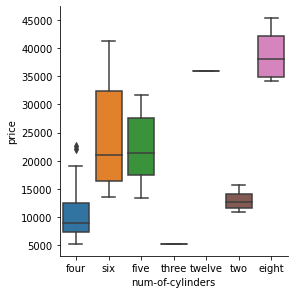

In [12]:
sns.catplot(x="num-of-cylinders", data=car,kind="count",height=4)
sns.catplot(x="num-of-cylinders", y="price", data=car,kind="box",height=4)

In [13]:
car["volume"]=car["length"]*car["width"]*car["height"]

In [14]:
car.drop(["length","width","height"],axis=1,inplace=True)

<AxesSubplot:>

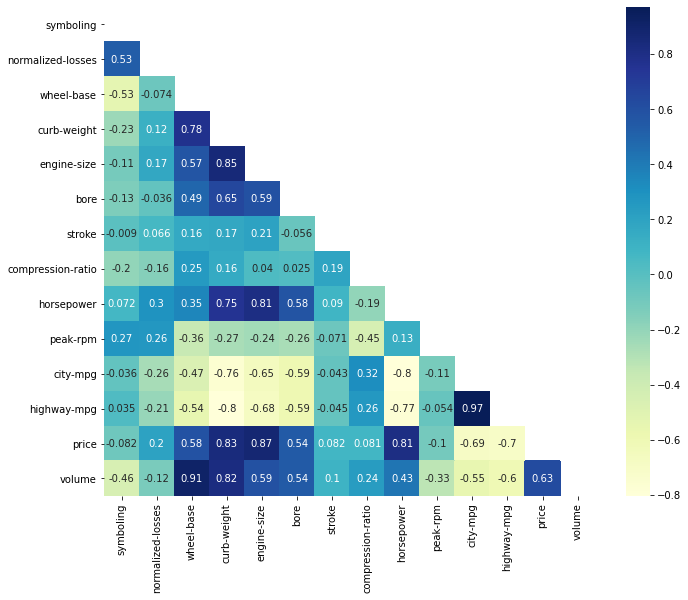

In [15]:
mask=np.zeros_like(car.corr())
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(car.corr(),mask=mask,cmap="YlGnBu",ax=ax,annot=True)

**wheel-base** has strong correlationship with **volume**, so we are going to remove it;
**city-mpg** has strong correlationship with **highway-mpg**, we remove it as well;
**curb-weight** is strong correlated with **horse-power**,**engine-size** and **volume**, it should be removed;
**stroke**,**compression-ratio* and **symboling** has significant small relationship with **price**, they should be removed

# Feature Engineering

In [16]:
numerical=["normalized-losses","volume","engine-size","horsepower","bore","highway-mpg","peak-rpm"]

In [17]:
car["normalized-losses"]=car.groupby(by="symboling")["normalized-losses"].transform(lambda x:x.fillna(x.mean()))

In [18]:
car.dropna(how="any",inplace=True)

#### 似乎cross_val_score不会对数据进行随机化，这在相似数据分组在一起时可能导致更糟的预测。我找到的最简单的解决方案（通过此答案）是在运行模型之前简单地对数据帧进行洗牌

In [19]:
shuffled_car = car.reindex(np.random.permutation(car.index))

In [20]:
shuffled_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,1956,ohc,four,92,1bbl,2.91,3.41,9,76.0,6000.0,30,34,7129.0,504960.000
89,1,128.0,nissan,gas,std,two,sedan,fwd,front,94.5,1889,ohc,four,97,2bbl,3.15,3.29,9,69.0,5200.0,31,37,5499.0,574764.630
86,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,2405,ohc,four,122,2bbl,3.35,3.46,9,88.0,5000.0,25,32,8189.0,581787.936
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,2811,ohc,four,156,mfi,3.60,3.90,7,145.0,5000.0,19,24,12964.0,576454.632
177,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,2458,ohc,four,122,mpfi,3.31,3.54,9,92.0,4200.0,27,32,11248.0,629411.860


In [21]:
X=shuffled_car.drop(["price"],axis=1)
y=shuffled_car["price"]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[numerical]=scaler.fit_transform(car[numerical])

In [23]:
X.drop(["symboling","curb-weight"],axis=1,inplace=True)

X.drop(["stroke","compression-ratio","city-mpg"],axis=1,inplace=True)

X.drop(["wheel-base"],axis=1,inplace=True)

In [24]:
X.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,peak-rpm,highway-mpg,volume
34,0.542655,honda,gas,std,two,hatchback,fwd,front,ohc,four,0.260377,1bbl,0.664286,0.294393,0.346939,0.289474,0.191621
89,0.542655,nissan,gas,std,two,sedan,fwd,front,ohc,four,0.260377,2bbl,0.664286,0.294393,0.346939,0.289474,0.191621
86,0.332851,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,0.343396,2bbl,0.100000,0.495327,0.346939,0.263158,0.343065
29,0.518325,dodge,gas,turbo,two,hatchback,fwd,front,ohc,four,0.181132,mfi,0.464286,0.252336,0.551020,0.368421,0.463117
177,0.518325,toyota,gas,std,four,hatchback,fwd,front,ohc,four,0.283019,mpfi,0.464286,0.313084,0.551020,0.157895,0.467993


In [25]:
categorical=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
             "num-of-cylinders","engine-type","fuel-system"]

In [26]:
dummies=pd.get_dummies(X[categorical])
X=X.join(dummies).drop(categorical,axis=1)

# Modeling

### Linear Regression

In [27]:
X.head()

,normalized-losses,engine-size,bore,horsepower,peak-rpm,highway-mpg,volume,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
34,0.542655,0.260377,0.664286,0.294393,0.346939,0.289474,0.191621,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
89,0.542655,0.260377,0.664286,0.294393,0.346939,0.289474,0.191621,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
86,0.332851,0.343396,0.100000,0.495327,0.346939,0.263158,0.343065,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
29,0.518325,0.181132,0.464286,0.252336,0.551020,0.368421,0.463117,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
177,0.518325,0.283019,0.464286,0.313084,0.551020,0.157895,0.467993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()
print("the R^2 score for linear regression is {:.3}".format(cross_val_score(lr, X, y, cv=5,scoring="r2").mean()))

the R^2 score for linear regression is -6.63e+20


In [30]:
cross_val_score(lr, X, y, cv=5)

array([-3.31748503e+21,  6.91663124e-01,  8.63710146e-01,  8.36788042e-01,
        8.87403017e-01])

### Lasso Regression (L1 Regularization)

In [31]:
from sklearn import linear_model
lasso=linear_model.Lasso(random_state=123)

In [32]:
cross_val_score(lasso, X, y, cv=5).mean()

0.8093857049253487

In [33]:
from sklearn.model_selection import GridSearchCV
params={"alpha":[10,50,100,200,300]}
g=GridSearchCV(lasso, param_grid=params).fit(X,y)

In [34]:
print(g.best_score_)
print(g.best_params_)

0.8226691527726032
{'alpha': 10}


In [ ]:
#g.cv_results_

In [85]:
params1={"alpha":range(10,50)}
g1=GridSearchCV(lasso, param_grid=params1,scoring="r2").fit(X,y)
print(g1.best_score_)
print(g1.best_params_)

0.8258928250999371
{'alpha': 17}


In [86]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5).fit(X,y)
print(lassocv.score(X,y))
print(lassocv.alpha_)

0.9153487510405095
18.974889769541882


In [39]:
#cross_val_score(linear_model.Lasso(alpha=lassocv.alpha_,random_state=123), X, y, cv=5).mean()

In [89]:
best_lasso=linear_model.Lasso(alpha=17,random_state=123).fit(X,y)

lasso_coefs=pd.Series(best_lasso.coef_ ,index=X.columns)
significant_lasso_coefs=pd.concat([lasso_coefs.sort_values().head(10),lasso_coefs.sort_values().tail(10)])

<AxesSubplot:>

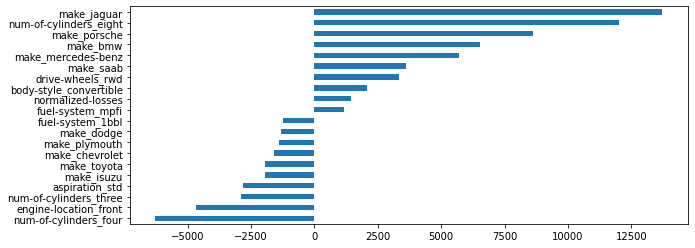

In [91]:
plt.figure(figsize=(10,4))
significant_lasso_coefs.plot(kind="barh")

In [102]:
print("lasso picked {0} variables and eliminated {1} variables.".format(
                len([i for i in best_lasso.coef_ if i != 0]),len([i for i in best_lasso.coef_ if i == 0])))

lasso picked 38 variables and eliminated 25 variables.


### Ridge Regression (L2 Regulariztion)

In [52]:
from sklearn.linear_model import Ridge
ridge=Ridge(random_state=123)

In [53]:
cross_val_score(ridge, X, y, cv=5).mean()

0.814601228487693

In [78]:
from sklearn.model_selection import GridSearchCV
params3={"alpha":[0.1,0.3,0.7,0.9,1]}
g3=GridSearchCV(ridge, param_grid=params3).fit(X,y)

In [79]:
print(g3.best_score_)
print(g3.best_params_)

0.820575608147126
{'alpha': 0.3}


In [81]:
#g3.cv_results

In [92]:
best_ridge=g3.best_estimator_.fit(X,y)

ridge_coefs=pd.Series(best_ridge.coef_ ,index=X.columns)
significant_ridge_coefs=pd.concat([ridge_coefs.sort_values().head(10),ridge_coefs.sort_values().tail(10)])

<AxesSubplot:>

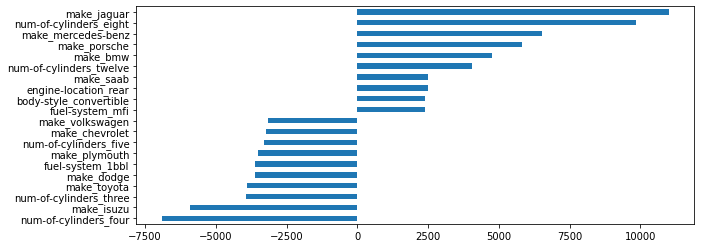

In [93]:
plt.figure(figsize=(10,4))
significant_ridge_coefs.plot(kind="barh")

### Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,random_state=0)

In [121]:
cross_val_score(forest,X,y,cv=5,scoring="r2")

array([0.83901231, 0.12879963, 0.84606824, 0.75494607, 0.74299016])

In [109]:
params2={"max_depth":range(3,11),"min_samples_split":range(2,20,1)}
g2=GridSearchCV(forest, param_grid=params2,n_jobs=-1).fit(X,y)

In [110]:
print(g2.best_score_)
print(g2.best_params_)

0.6669736481933427
{'max_depth': 6, 'min_samples_split': 4}


In [111]:
g2.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_split=4, random_state=0)

In [112]:
best_tree=g2.best_estimator_

In [113]:
tree_coefs=pd.Series(best_tree.feature_importances_,index=X.columns).sort_values()

<AxesSubplot:>

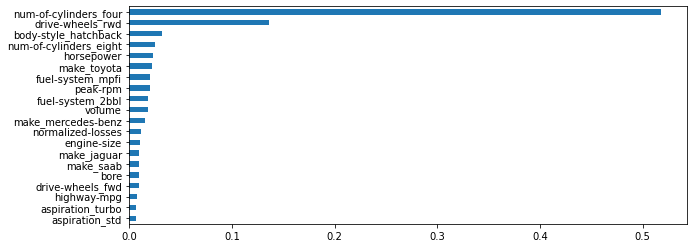

In [114]:
significant_tree_coefs=tree_coefs.tail(20)
plt.figure(figsize=(10,4))
significant_tree_coefs.plot(kind="barh")